### Notebook for the generation of an option file for Marker Processing ###

In [1]:
# Add directory to the marker processing libraries
import sys
import importlib
sys.path.append('../')

### Configuration of the Parcel Source ###

In [2]:
from pds_widgets import parcel_data_source_widget
ps = parcel_data_source_widget()
ps

parcel_data_source_widget(children=(Box(children=(Label(value='Parcel Data sources:'), RadioButtons(layout=Lay…

### Configuration of the Time Series Sources ###

In [3]:
from dr_widgets import DataReaderTab
drt = DataReaderTab()
drt

DataReaderTab(children=(Tab(), HBox(children=(Button(description='Add', icon='Add', style=ButtonStyle(), toolt…

In [4]:
ts_options = drt.dump()

# Create the actual time series sources
import time_series_sources as tss

ts_source_factory = tss.time_serie_source_factory()
ts_sources = ts_source_factory.get_time_series_sources(ts_options)

# Build the signal/components dictionary
signal_components = {}
for ts_source in ts_sources :
    signal_components[ts_source.get_signal_type()] = ts_source.get_components()
    
signal_components

{}

### Configuration of the Pre-Processors ###

In [5]:
from pp_widgets import processing_tab
pt = processing_tab(signal_components)
pt

processing_tab(children=(Tab(children=(processing_line(children=(HTML(value='<B>Processing Line</B>'), Text(va…

In [6]:
# Merge the signal/component dictionaries
sc_dict = {**signal_components, **(pt.get_signal_components())}
sc_dict

{}

### Configuration of the Marker Detectors ###

In [7]:
from md_widgets import marker_detector_tab
md = marker_detector_tab(sc_dict)
md

marker_detector_tab(children=(Tab(), HBox(children=(Button(description='Add', icon='Add', style=ButtonStyle())…

### Marker Aggregation ###

In [8]:
import ma_widgets
importlib.reload(ma_widgets)

al = ma_widgets.action_line(list(sc_dict.keys()))
al

action_line(children=(HBox(children=(Button(description='Add', icon='Add', style=ButtonStyle()), Dropdown(opti…

In [9]:
import se_widgets
importlib.reload(se_widgets)

se = se_widgets.scenario_evidence_widget(al.dump()["marker-aggregator"], md.dump()["marker-detectors"])
se

scenario_evidence_widget(children=(VBox(children=(Dropdown(description='Primary Marker:', options=(), value=No…

### Configuration of the Data Displayers ###

In [10]:
import dd_widgets
importlib.reload(dd_widgets)

dt = dd_widgets.data_displayer_tab(sc_dict)
dt

data_displayer_tab(children=(Tab(children=(base_data_displayer_widget(children=(SelectMultiple(description='Si…

In [11]:
import full_initializer
importlib.reload(full_initializer)
wi = full_initializer.w_initializer(ps, drt, pt, md, dt, al, se, "./config/main.json")
wi

w_initializer(children=(HTML(value='<B>Initialize all elements</B>'), Button(description='Initialize All', ico…

### Finally run the main script ###

In [14]:
%run ../main.py notebook=True parcel_num=10

Coonection to DB established
The table dk.parcels_2020 has 1321 rows.
Parcel data loaded 

Connection to DB established
Connection to DB established
Time series loaded


  0%|          | 0/10 [00:00<?, ?it/s]

### Check the Results ###

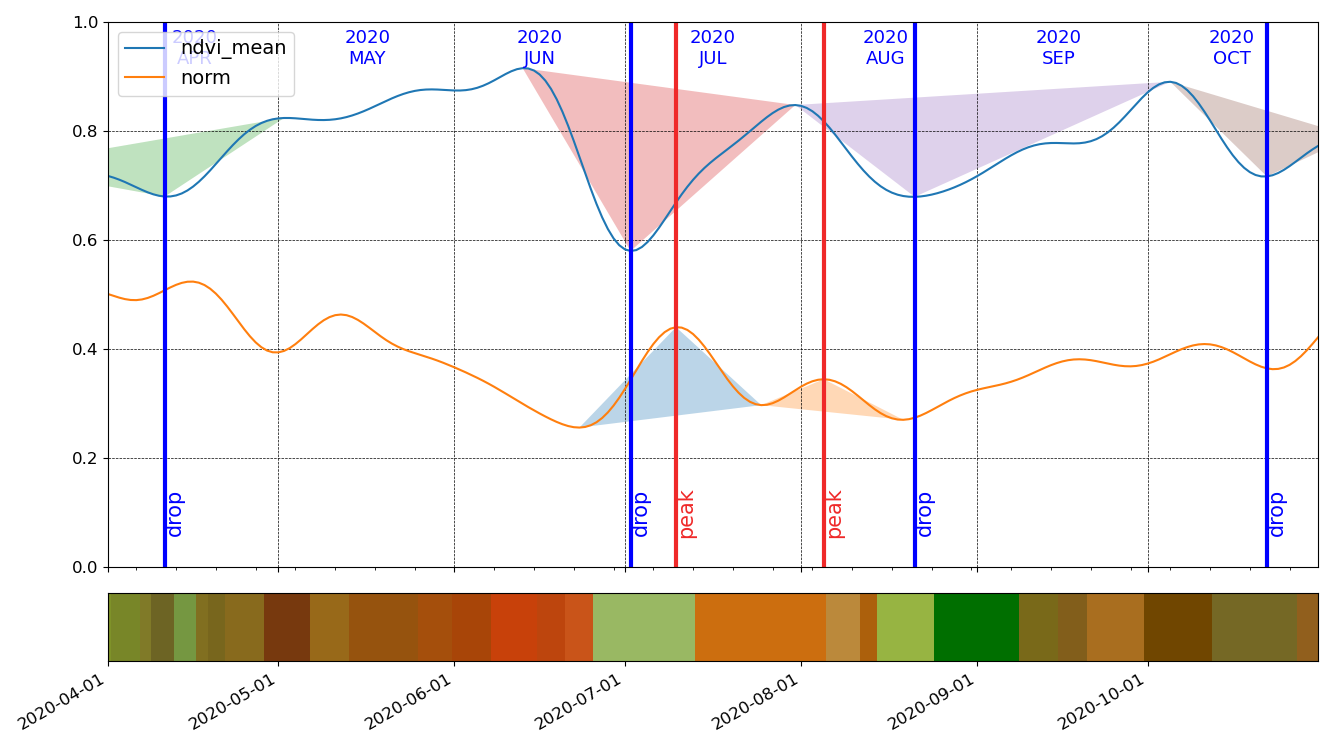

In [15]:
import json
import os 
from IPython.display import display, Image

optionfile = open("./config/main.json")
options = json.load(optionfile)

path_name = None
if "data-displayers" in options :
    dd = options["data-displayers"]
    path_name = dd[0]["output_folder"]

prefix = "compo"

png_file = []
if path_name is not None :
    png_files = [f for f in os.listdir(path_name) if f.startswith(prefix)]
    
if len(png_files) > 0 :
    png_file_name = path_name + "/" + png_files[0]
    img = Image(png_file_name)
    display(img)